# Simpson's Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import (plot_simpsons, point_gridlines, lagrange,
                    FIGSIZE, LW, FS, SOLID_COLOR)

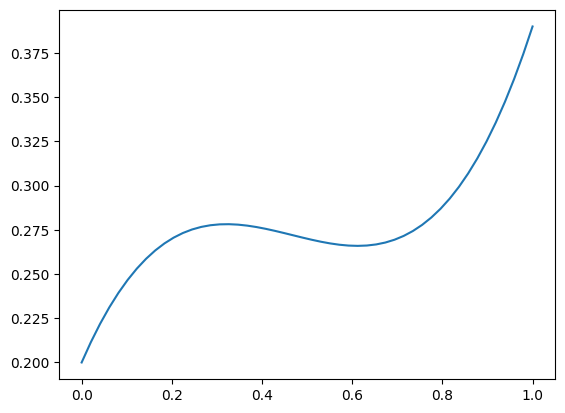

In [2]:
def f(x):
    return x*(x-0.7)**2 + 0.1*x + 0.2

x = np.linspace(0, 1)
plt.plot(x, f(x))

plt.show()

A way to interpret the trapezoidal method is that we approximate the integrand curve as a straight line, and then integrate that directly. The Simpson's method does something similar, but instead of only using the integrand values at the boundaries it uses a third point (the midpoint) to approximate the integrand as a parabola.

The method approximates the integral as:

$$
\int_a^b f(x)~ dx \approx \frac{b - a}{6} \left[ f(a) + 4 f\left(\frac{a + b}{2}\right) + f(b)\right]
$$

with the derivation of this in the following section.

## Derivation

### Approximating $f(x)$ as a Quadratic Polynomial

In order to approximate $f(x)$ as a quadratic polynomial we can use a second order Lagrange polynomial. We construct this polynomial by using 3 data points $(a, f(a))$, $(m, f(m))$ and $(b, f(b))$.

$$
L(x) = f(a) \frac{(x - m)(x - b)}{(a - m)(a - b)} + f(m) \frac{(x - a)(x - b)}{(m - a)(m - b)} + f(b) \frac{(x - a)(x - m)}{(b - a)(b - m)}
$$

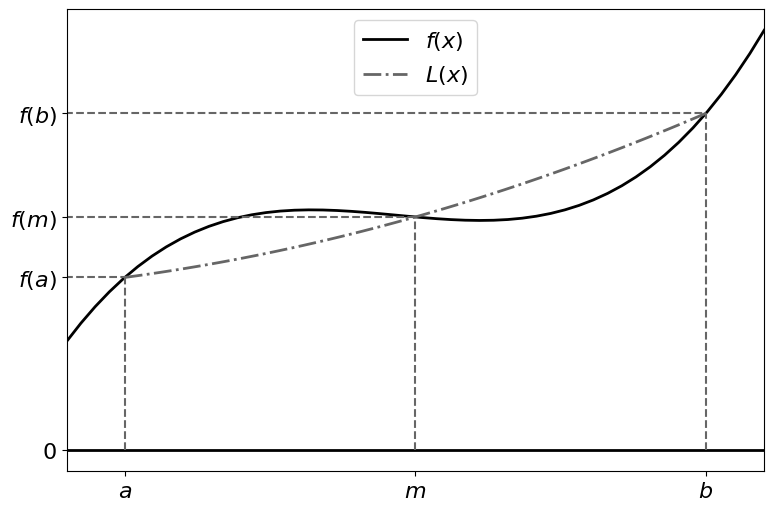

In [3]:
xlims = [-0.1, 1.1]

fig, ax = plt.subplots(figsize = FIGSIZE)

x = np.linspace(*xlims)

ax.plot(x, f(x), 'k', linewidth = LW, label = r'$f(x)$')
ax.plot(xlims, [0,0], 'k', linewidth = LW)

x_norm = np.linspace(0,1)

ax.plot(x_norm, lagrange(x_norm, [0, 0.5, 1], [f(0), f(0.5), f(1)]), color = SOLID_COLOR, linestyle = '-.', linewidth = LW, label = r'$L(x)$')

point_gridlines( ax, 0, f(0) )
point_gridlines( ax, 0.5, f(0.5) )
point_gridlines( ax, 1, f(1) )

ax.legend(loc = 9, fontsize = FS)

ax.set_xlim(xlims)

ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels([r'$a$', r'$m$', r'$b$'], fontsize = FS)

ax.set_yticks([0, f(0), f(0.5), f(1)])
ax.set_yticklabels(['0', r'$f(a)$', r'$f(m)$', r'$f(b)$'], fontsize = FS)

plt.show()

If we use the midpoint of $[a, b]$ for $m$, i.e:

$$
m = \tfrac{1}{2} (a + b)
$$

then we have

$$
m - a = b - m = \tfrac{1}{2} (b - a)
$$


and the Lagrange polynomial becomes:

$$
L(x) = \frac{2}{(b - a)^2} \big[ f(a) (x - m) (x - b) - 2 f(m) (x - a) (x - b) + f(b)(x - a)(x - m) \big]
$$

### Integrating $L(x)$

Now, we wish to approximate the integral of $f(x)$ as the integral of our Lagrange polynomial:

$$
\int_a^b f(x)~ dx \approx \int_a^b L(x)~ dx
$$

illustrated in the figure below:

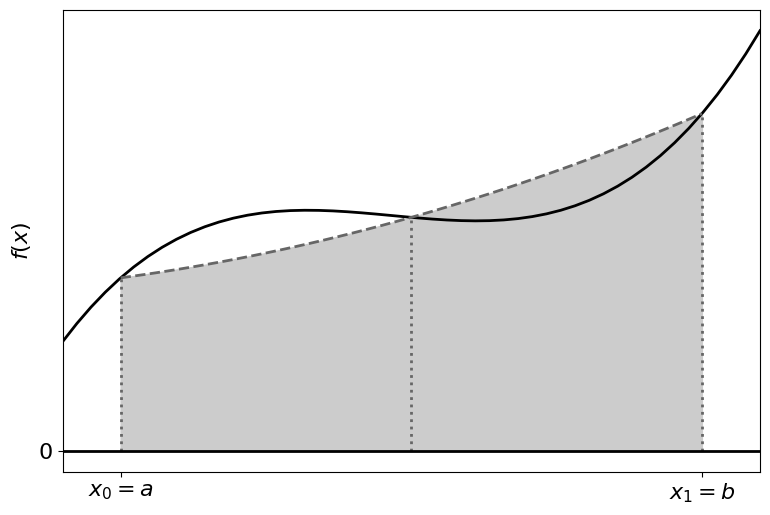

In [4]:
fig, ax = plot_simpsons(f, 0, 1, 1, [-0.1, 1.1])

plt.show()

by substituting the variable:

$$
u = \frac{x - m}{b - m} = 2 \frac{x - \tfrac{1}{2} (a + b)}{b - a}
$$

into the integral of $L(x)$ we find that:

$$
\int_a^b L(x)~dx = \frac{b - a}{6} \left[ f(a) + 4 f\left(\frac{a + b}{2}\right) + f(b) \right]
$$

thus, we approximate the integral of $f(x)$ as:

$$
\int_a^b f(x) ~dx \approx \frac{b -a}{6} \left[f(a) + 4 f\left(\frac{a + b}{2}\right) + f(b) \right]
$$

### Alternative Derivation

Another way to see the Simpson's rule is as a weighted average of the midpoint and trapezoidal rules:

    2/3 midpoint + 1/3 trapezoidal

Mathematically:

\begin{align*}
\int_a^b f(x)~ dx &\approx \frac{2}{3} f\left(\frac{a + b}{2}\right) (b - a) + \frac{1}{3} \times \frac{1}{2} (b - a) [f(a) + f(b)]\\
                 &\approx \frac{b - a}{6} \left[ f(a) + 4 f\left(\frac{a + b}{2}\right) + f(b)\right]\\   
\end{align*}


## Composite Simpson's Rule

As before we can improve the accuracy of our solution by subdividing the interval and calculating the integral using Simpson's rule for each subinterval.

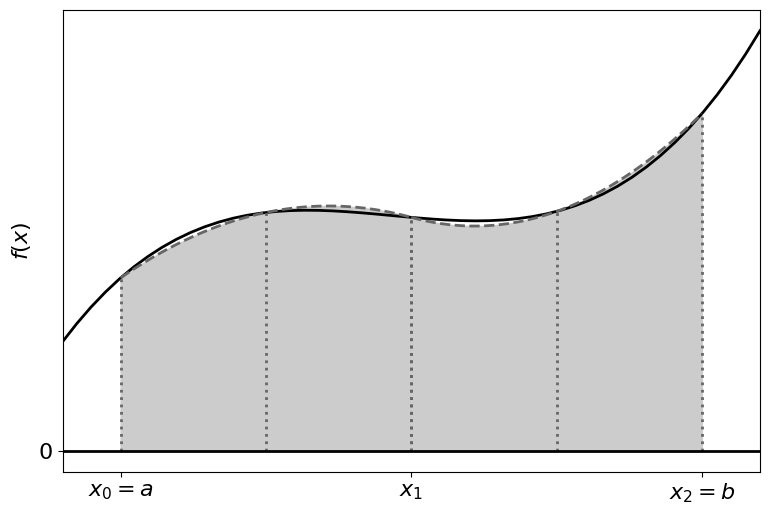

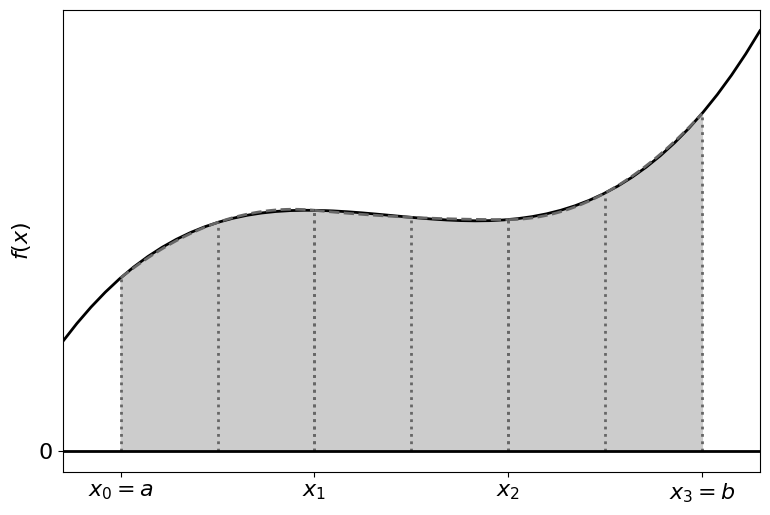

In [5]:
N = 2

figs, axs = N*[None], N*[None]

for i in range(0,N):
    figs[i], axs[i] = plot_simpsons(f, 0, 1, i+2, [-0.1, 1.1,])
plt.show()

The composite Simpson's rule is given by:

$$
\int_a^b f(x)~ dx \approx \sum_{i = 1}^n \frac{x_i - x_{i-1}}{6} \left[ f(x_{i-1}) + 4 f\left(\frac{x_{i-1} + x_i}{2}\right) + f(x_i)\right]\\
$$

<!---
Where $x_0 = a$, $x_n = b$ and $x_i = a +  i(b - a)/n$.
--->

If we use equal sized subintervals, then we have that:

$$
x_i - x_{i -1} = \frac{b - a}{n}
$$

taking this into account and the values of $f(x_i)$ which are repeated in the sum, the composite Simpson's rule can be simplified to:

$$
\int_a^b f(x)~ dx \approx \frac{b - a}{6 n} \left[ f(a) + 2 \sum_{i = 2}^{n-1} f(x_i) + 4 \sum_{i =1}^{n} f\left( \frac{x_{i-1} + x_i}{2} \right) + f(b) \right]
$$

Assuming that $0 < \tfrac{b - a}{6 n} < 1$, then the error for this method is $O\left(\tfrac{1}{n}^4\right)$ {cite}`nm-i-s-epperson-numerical-methods`

### Composite Simpson's Rule with a Discrete Data Set

Again, consider the data set $(x_i, y_i)$ for $i = 0, \dots, n$, where 

$$
f(x_i) = y_i
$$


Approximating the integral of the data using Simpson's rule is a lot less straight forward than the Midpoint and Trapezoidal rule as we can't calculate $f\left((x_{i -1} + x_i)/2\right)$ directly, and the function values at the boundaries of the intervals are also required.

If the $x_i$ values are **uniformly spaced** (with $x_i - x_{i-1} = \Delta x$) and there is an odd number of data points, we can pair up the intervals between the points. Treating each pair of subintervals as a single subinterval, we can use the middle $x$ values as the midpoints. In other words, for even $i= 2j$, the $x_{2j}$ are used as the boundaries of the sub-intervals; for odd $i = 2k -1$, the $x_{2k-1}$ are used as the midpoints of the subinterval. Thus the integral is approximated as:

$$
\int_{x_0}^{x_n} f(x)~dx \approx \frac{\Delta x}{3} \left[y_0 + 2 \sum_{i = 1}^{n/2 - 1} y_{2i} + 4 \sum_{i=1}^{n/2} y_{2i-1} + y_n \right] 
$$

Note that 

$$
\frac{b - a}{6 n} = \frac{2 \Delta x}{6} = \frac{\Delta x}{3}
$$

as each subinterval is made up of two intervals of length $\Delta x$ each.

## References
```{bibliography} ../../../_bibliography/references.bib
:cited:
:style: plain
:labelprefix: IntSimp
:keyprefix: nm-i-s-
```